#  Bay Wheels Ride Data Exploration and Visualization
## by Mai Rezk
### introduction about the data set 
This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.
in specific New York City, NY ('https://s3.amazonaws.com/tripdata/index.html')
for the year 2020 which can give us an intersten ininsights in the year of global pandemic (covid19) and quarantine how does that affect the whole bike sharing sysytem 
(https://www.citibikenyc.com/system-data)

## Preliminary Wrangling



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

### loading the data  and Data Wrangling

In [2]:
# get data file names
path = r'Dataset' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,146,2020-12-01 00:02:50.1450,2020-12-01 00:05:16.1940,3202,Newport PATH,40.727224,-74.033759,3199,Newport Pkwy,40.728745,-74.032108,42308,Subscriber,1989,2
1,572,2020-12-01 00:11:57.3910,2020-12-01 00:21:30.2510,3640,Journal Square,40.733670,-74.062500,3280,Astor Place,40.719282,-74.071262,18568,Subscriber,1997,2
2,387,2020-12-01 00:14:49.3610,2020-12-01 00:21:16.8730,3640,Journal Square,40.733670,-74.062500,3194,McGinley Square,40.725340,-74.067622,44543,Subscriber,1960,1
3,188,2020-12-01 00:45:06.3680,2020-12-01 00:48:14.4280,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,43098,Subscriber,1998,1
4,594,2020-12-01 01:17:17.0110,2020-12-01 01:27:11.9400,3212,Christ Hospital,40.734786,-74.050444,3209,Brunswick St,40.724176,-74.050656,44723,Subscriber,1988,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11694 entries, 0 to 11693
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             11694 non-null  int64  
 1   starttime                11694 non-null  object 
 2   stoptime                 11694 non-null  object 
 3   start station id         11694 non-null  int64  
 4   start station name       11694 non-null  object 
 5   start station latitude   11694 non-null  float64
 6   start station longitude  11694 non-null  float64
 7   end station id           11694 non-null  int64  
 8   end station name         11694 non-null  object 
 9   end station latitude     11694 non-null  float64
 10  end station longitude    11694 non-null  float64
 11  bikeid                   11694 non-null  int64  
 12  usertype                 11694 non-null  object 
 13  birth year               11694 non-null  int64  
 14  gender                

We can see that the number of this year rides comparing two 2018 from the last submit is significantly smalie and that due to covid19 and the quarantine

In [5]:
df.isnull().sum()
# no null values 

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [6]:
df.duplicated().sum()
# no

0

In [7]:
# data asseting 
# from the df we have 3 categorical data 

In [8]:
df.gender.value_counts()

1    7765
2    2568
0    1361
Name: gender, dtype: int64

In [9]:
df.usertype.value_counts()

Subscriber    9404
Customer      2290
Name: usertype, dtype: int64

###  Data Cleaning


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11694 entries, 0 to 11693
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             11694 non-null  int64  
 1   starttime                11694 non-null  object 
 2   stoptime                 11694 non-null  object 
 3   start station id         11694 non-null  int64  
 4   start station name       11694 non-null  object 
 5   start station latitude   11694 non-null  float64
 6   start station longitude  11694 non-null  float64
 7   end station id           11694 non-null  int64  
 8   end station name         11694 non-null  object 
 9   end station latitude     11694 non-null  float64
 10  end station longitude    11694 non-null  float64
 11  bikeid                   11694 non-null  int64  
 12  usertype                 11694 non-null  object 
 13  birth year               11694 non-null  int64  
 14  gender                

In [11]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [12]:
# we need to fix starttime and end time formate 
# change start station name and end station name to string  
# usertype and gender to catogircal 

In [13]:
# first lets copy the df 
df2=df.copy()

In [14]:
# fix start and end time format 

df2['starttime'] = pd.to_datetime(df2['starttime'],format='%Y-%m-%d %H:%M:%S')
df2['stoptime'] = pd.to_datetime(df2['stoptime'],format='%Y-%m-%d %H:%M:%S')


In [15]:
# extract the hours , days , months from the date fromat 
df2['start_hourofday'] = df2['starttime'].dt.strftime('%H')
df2['start_day'] = df2['starttime'].dt.strftime('%A')
df2['start_month'] = df2['starttime'].dt.strftime('%B')

In [16]:
#we need to  specifying the type of Categorical data independent of the values, with categories and orderness 

In [17]:
days = pd.api.types.CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df2['start_day']=df2['start_day'].astype(days)

month = pd.api.types.CategoricalDtype(ordered=True, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
df2['start_month'] = df2['start_month'].astype(month)

In [18]:
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_hourofday,start_day,start_month
0,146,2020-12-01 00:02:50.145,2020-12-01 00:05:16.194,3202,Newport PATH,40.727224,-74.033759,3199,Newport Pkwy,40.728745,-74.032108,42308,Subscriber,1989,2,00,Tuesday,December
1,572,2020-12-01 00:11:57.391,2020-12-01 00:21:30.251,3640,Journal Square,40.733670,-74.062500,3280,Astor Place,40.719282,-74.071262,18568,Subscriber,1997,2,00,Tuesday,December
2,387,2020-12-01 00:14:49.361,2020-12-01 00:21:16.873,3640,Journal Square,40.733670,-74.062500,3194,McGinley Square,40.725340,-74.067622,44543,Subscriber,1960,1,00,Tuesday,December
3,188,2020-12-01 00:45:06.368,2020-12-01 00:48:14.428,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,43098,Subscriber,1998,1,00,Tuesday,December
4,594,2020-12-01 01:17:17.011,2020-12-01 01:27:11.940,3212,Christ Hospital,40.734786,-74.050444,3209,Brunswick St,40.724176,-74.050656,44723,Subscriber,1988,1,01,Tuesday,December


In [19]:
# usertype and gender and start and end sation to catogircal 
df2['usertype'] = df2['usertype'].astype('category')
df2['gender'] = df2['gender'].astype('category')
df2['start station name']=df2['start station name'].astype('category')
df2['end station name']=df2['end station name'].astype('category')


In [20]:
# tripduration format to min instade of sec to be more infomative 
df2['tripduration']=df2['tripduration']/60



In [21]:
# extract age from birth yearand add it as a new columns 
df2['user_age'] = 2021 - df2['birth year']

In [22]:
df2.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'start_hourofday', 'start_day', 'start_month',
       'user_age'],
      dtype='object')

In [23]:
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_hourofday,start_day,start_month,user_age
0,2.433333,2020-12-01 00:02:50.145,2020-12-01 00:05:16.194,3202,Newport PATH,40.727224,-74.033759,3199,Newport Pkwy,40.728745,-74.032108,42308,Subscriber,1989,2,00,Tuesday,December,32
1,9.533333,2020-12-01 00:11:57.391,2020-12-01 00:21:30.251,3640,Journal Square,40.733670,-74.062500,3280,Astor Place,40.719282,-74.071262,18568,Subscriber,1997,2,00,Tuesday,December,24
2,6.450000,2020-12-01 00:14:49.361,2020-12-01 00:21:16.873,3640,Journal Square,40.733670,-74.062500,3194,McGinley Square,40.725340,-74.067622,44543,Subscriber,1960,1,00,Tuesday,December,61
3,3.133333,2020-12-01 00:45:06.368,2020-12-01 00:48:14.428,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,43098,Subscriber,1998,1,00,Tuesday,December,23
4,9.900000,2020-12-01 01:17:17.011,2020-12-01 01:27:11.940,3212,Christ Hospital,40.734786,-74.050444,3209,Brunswick St,40.724176,-74.050656,44723,Subscriber,1988,1,01,Tuesday,December,33


In [24]:
# save the clean data to a .csv file

df.to_csv(r'C:\Users\speed link\Desktop\project 3\project C\fordgobike_trips_2020.csv', index=False)

### What is the structure of your dataset?

> tripduration : how long the trip took in seconds 
> starttime : from it we extract the start hour , day and mounth 
> sation info : as name and id 
>user info : as gneder and age which we extract it from the birth year 
>usertype as a Subscriber to the system or Customer
### What is/are the main feature(s) of interest in your dataset?

> trip durtion and the it is realtionship to specific day , hour , the type of user , age ,station , and gender 
> 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> user info 
> ride info (time wise)


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

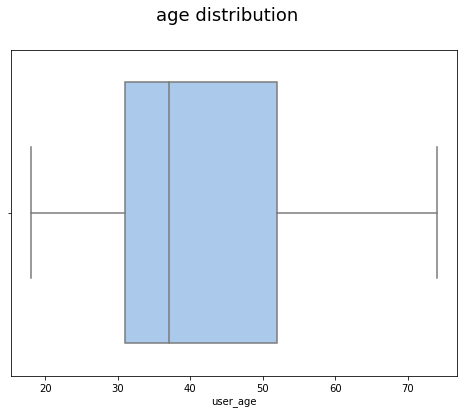

In [25]:
# lets plot the age to undersatnd beeter our range of the users 
plt.figure(figsize = [8, 6])
chart=sb.set_palette("pastel")
chart=sb.boxplot(data=df2, x='user_age');
plt.suptitle('age distribution', fontsize=18);


 we can see that we have no outliers and the majourity of our data is in 32:53 range (approximitly) , the age medin is in 38 (approximity


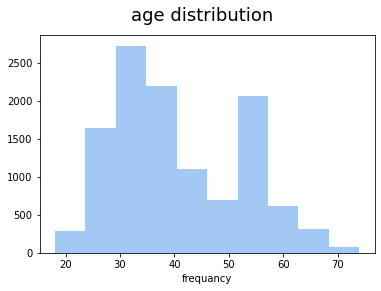

In [26]:
# lets look at the age again using hisgram 
plt.hist(data=df2, x='user_age')
plt.xlabel('age');
plt.xlabel('frequancy');
plt.suptitle('age distribution', fontsize=18);

 we can see that the majourity of the user are in 30 :33 range and also in 53 :58

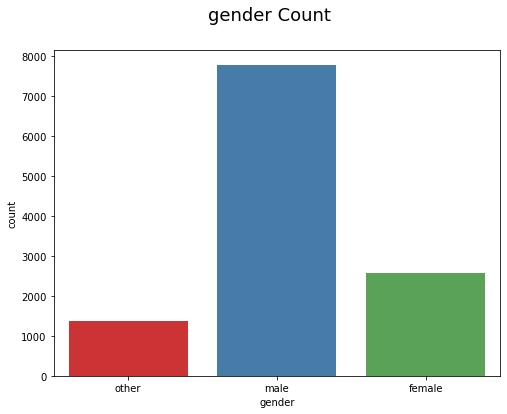

In [27]:
# lets plot the gender 
plt.figure(figsize=(8,6))
chart = sb.countplot(data=df2,x='gender',palette='Set1')
chart.set_xticklabels(['other','male','female'])
plt.suptitle('gender Count', fontsize=18);

we can see that the majourty of the users are male 

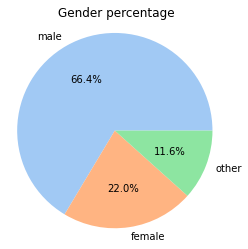

In [28]:
# lets look into the gnder percentage 
sorted_vals = df2['gender'].value_counts()/df2.shape[0];
plt.pie(sorted_vals, labels=['male','female','other',], autopct='%1.1f%%',normalize=False);
plt.axis('square')
plt.title('Gender percentage')
plt.show()

we can see that males are tha majourity with 66.4 % then female with 22 % 

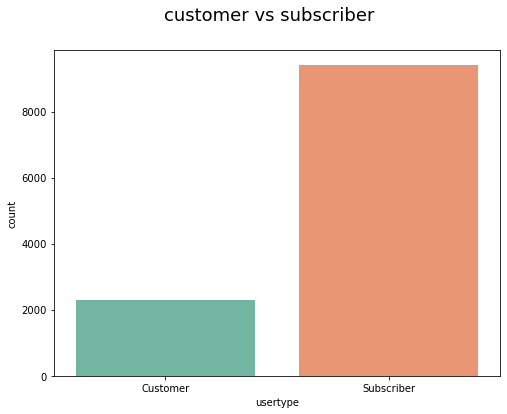

In [29]:
# lets  plot user type 
plt.figure(figsize=(8,6))
chart = sb.countplot(data=df2,x='usertype',palette='Set2')
plt.suptitle('customer vs subscriber', fontsize=18);

we can see that the majourity of the user are  subscriber 

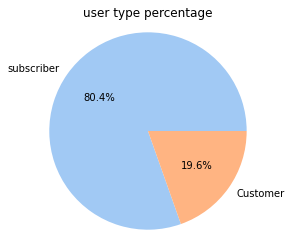

In [30]:
# lets look into the percentage 
sorted_vals = df2['usertype'].value_counts()/df2.shape[0];
plt.pie(sorted_vals, labels=['subscriber','Customer'], autopct='%1.1f%%',normalize=False);
plt.axis('square')
plt.title('user type percentage')
plt.show()

we can see that the subscriber are indeed the majority of the users

Text(0.5, 0.98, ' Trip duration distribution')

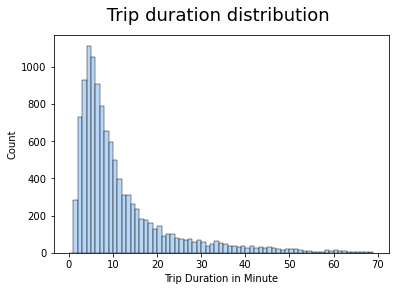

In [31]:
bins = np.arange(0, 70, 1)
ticks = np.arange(0, 70, 5)
sb.histplot(data=df2, x="tripduration", bins=bins ,palette='Set2')
plt.xlabel('Trip Duration in Minute');
plt.suptitle(' Trip duration distribution',fontsize=18)

we can see that most of the trips tend to be less than 10 mins and it is so rarely to go over 1 hour 

In [32]:
# lets plot start station name 
df2['start station name'].value_counts()

Grove St PATH                 776
Newport Pkwy                  721
Sip Ave                       607
Marin Light Rail              489
Hamilton Park                 445
Harborside                    391
Warren St                     385
JC Medical Center             374
Newport PATH                  355
City Hall                     352
Washington St                 350
Columbus Dr at Exchange Pl    343
Morris Canal                  315
Liberty Light Rail            300
Brunswick St                  284
Columbus Drive                256
Jersey & 3rd                  254
Manila & 1st                  246
Brunswick & 6th               239
Jersey & 6th St               235
Van Vorst Park                232
Baldwin at Montgomery         232
Newark Ave                    232
Paulus Hook                   227
McGinley Square               222
Grand St                      218
Fairmount Ave                 215
Dixon Mills                   176
Pershing Field                158
Essex Light Ra

[Text(0, 0, '5 Corners Library'),
 Text(1, 0, 'Astor Place'),
 Text(2, 0, 'Baldwin at Montgomery'),
 Text(3, 0, 'Bergen Ave'),
 Text(4, 0, 'Brunswick & 6th'),
 Text(5, 0, 'Brunswick St'),
 Text(6, 0, 'Christ Hospital'),
 Text(7, 0, 'City Hall'),
 Text(8, 0, 'Columbus Dr at Exchange Pl'),
 Text(9, 0, 'Columbus Drive'),
 Text(10, 0, 'Communipaw & Berry Lane'),
 Text(11, 0, 'Dey St'),
 Text(12, 0, 'Dixon Mills'),
 Text(13, 0, 'Essex Light Rail'),
 Text(14, 0, 'Fairmount Ave'),
 Text(15, 0, 'Glenwood Ave'),
 Text(16, 0, 'Grand St'),
 Text(17, 0, 'Grove St PATH'),
 Text(18, 0, 'Hamilton Park'),
 Text(19, 0, 'Harborside'),
 Text(20, 0, 'Heights Elevator'),
 Text(21, 0, 'Hilltop'),
 Text(22, 0, 'Hoboken Ave at Monmouth St'),
 Text(23, 0, 'JC Medical Center'),
 Text(24, 0, 'Jackson Square'),
 Text(25, 0, 'Jersey & 3rd'),
 Text(26, 0, 'Jersey & 6th St'),
 Text(27, 0, 'Journal Square'),
 Text(28, 0, 'Lafayette Park'),
 Text(29, 0, 'Leonard Gordon Park'),
 Text(30, 0, 'Liberty Light Rail'),
 Text

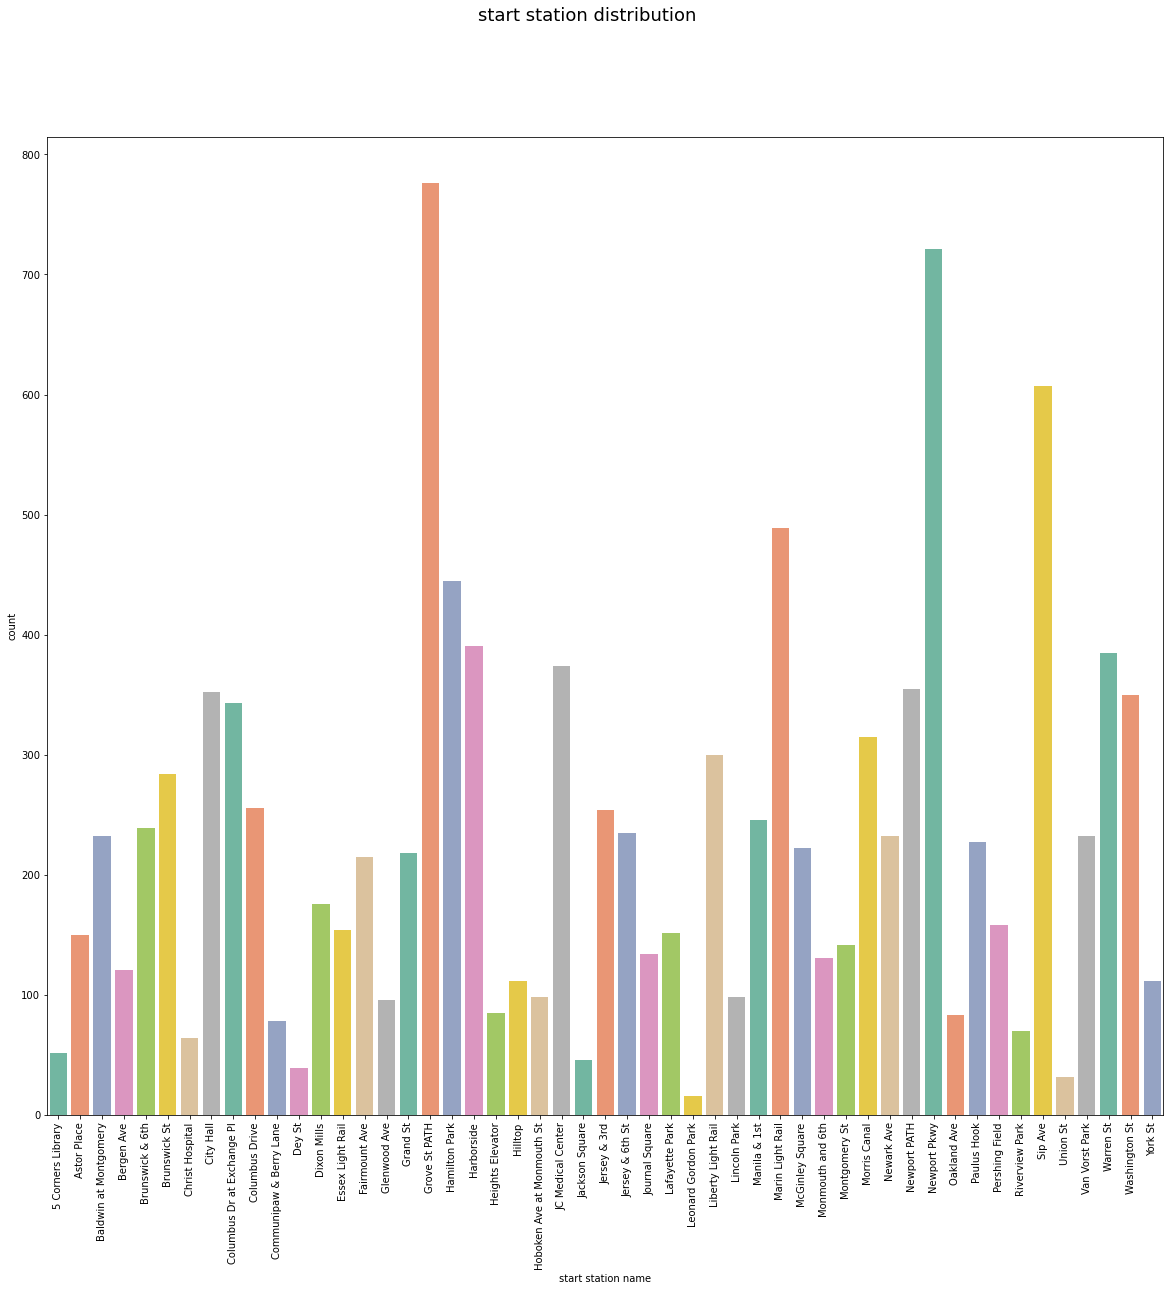

In [33]:
plt.figure(figsize=(20,18))
chart = sb.countplot(data=df2,x='start station name',palette='Set2')
plt.suptitle('start station distribution', fontsize=18);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

 we can see that Grove St PATH and Newport Pkwy are the cities that most of the trips start from and Leonard Gordon Park  is the least city that trips start from it 

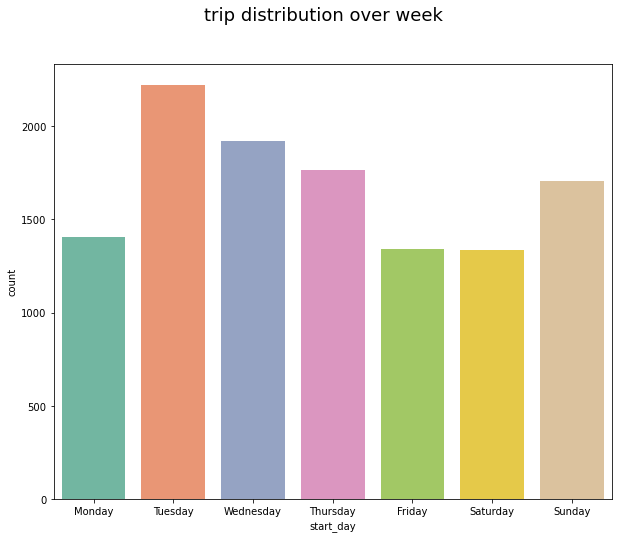

In [34]:
# lets plot the days of the trip 
plt.figure(figsize=(10,8))
chart = sb.countplot(data=df2,x='start_day',palette='Set2')
plt.suptitle('trip distribution over week', fontsize=18);


we can see that the majourity of user uses the system on tuesday 
 but it is intersted to find that even monday is a work day even if it will be from home due to quarantine is still the least busy day in addtion to friday and satruday which are weekends
 we can be sure we cannot be certan that tueday and wednesday pepole use the system to go to work cuase most buesness worked from home , but it may also be a suervies busness which will recure offline work or somthing 

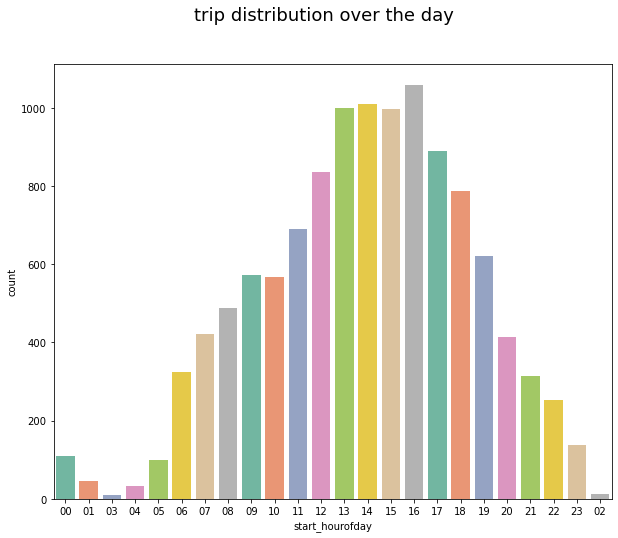

In [35]:
# lets plot the hours of the day to lear more about the user habits 
plt.figure(figsize=(10,8))
chart = sb.countplot(data=df2,x='start_hourofday',palette='Set2')
plt.suptitle('trip distribution over the day', fontsize=18);


 that is really intersting ! we can see that the users of the system use it the most from 12 : 15 pm which is not tybical work hours 
 so may say that the biggest case of the rides not necessary to work and maybe users in fact work from home in that year 

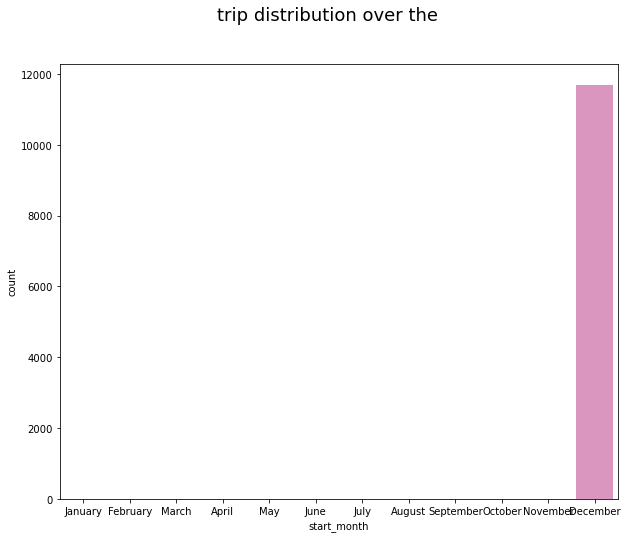

In [36]:
# lets plot the months 
plt.figure(figsize=(10,8))
chart = sb.countplot(data=df2,x='start_month',palette='Set2')
plt.suptitle('trip distribution over the ', fontsize=18);


wow that a fascinating result ! it crealy shows us that user in fact were quarantined for the enter year ! expect for december in which the restrictions become less stric 

In [37]:
# to make sure 
df2['start_month'].value_counts()

December     11694
November         0
October          0
September        0
August           0
July             0
June             0
May              0
April            0
March            0
February         0
January          0
Name: start_month, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> we find that the majourty of users are males 
> the subscribed user are more than customers 
> trips dauration are short less than 10 min so user didnot spend much time outside 
> we trasfoirm birth year to age by subtract 2021 from it
> befor ploting our date info we needed to conver day, month to cotigorical 
> we also conver the gnder to catigorical

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> we find that the busiest houres of the system were past 12 pm which may indacte that user in fact work from home if before quraitne their work start normaily at 6 am 
>we also find that all of this year (2020) rides happend in December only which can mean that users in fact recpect the qurainte restrictions

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

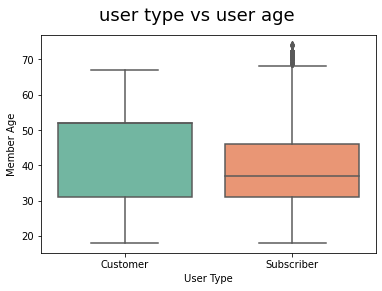

In [38]:
sb.boxplot(data=df2, x='usertype', y='user_age',palette='Set2' );
plt.xlabel('User Type');
plt.ylabel('Member Age');
plt.suptitle('user type vs user age  ', fontsize=18,);

In [39]:
# we can see that customer has wider IQR than the subscriber and also the subscruber type has outliers above 65 years 

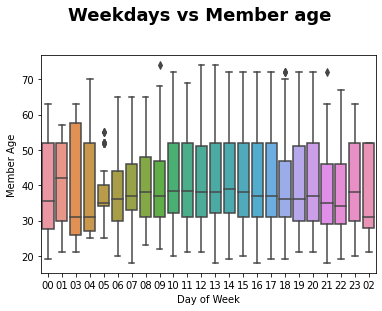

In [40]:
sb.boxplot(data=df2, x='start_hourofday', y='user_age');
plt.xlabel('Day of Week');
plt.ylabel('Member Age');
plt.suptitle('Weekdays vs Member age ', y=1.05, fontsize=18, fontweight='semibold');

we can see that the most constant hours of the day are from 11 : 17 pm and almost have the same age median as 35 
user younger than 26 almost didnot use the system 
there are some outliyers we can see in 4 am , 0 am , 18 pm , 21 pm and the user are older than 50 so maybe they use the system as trip of relaxition 

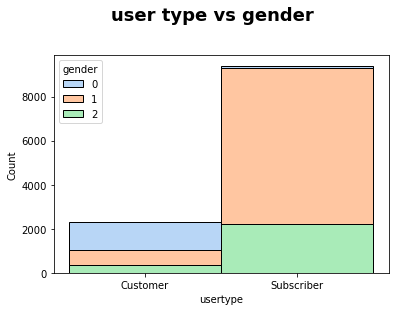

In [41]:
# gender and usertype relationship
chart=sb.histplot(binwidth=0.5, x="usertype", hue="gender", data=df2, stat="count", multiple="stack")
plt.suptitle('user type vs gender ', y=1.05, fontsize=18, fontweight='semibold');

we can see that the majourty of subscriber user are males (as 1 indacte males) but interstingly enogh the majourty of custmers chose not to spcify a gender 

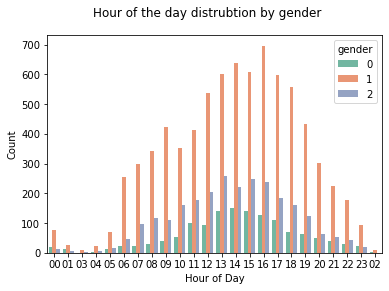

In [42]:
chart=sb.countplot(data=df2, x='start_hourofday', hue='gender',palette='Set2');
plt.xlabel('Hour of Day');
plt.ylabel('Count');
plt.suptitle('Hour of the day distrubtion by gender ' );


we can see that males uses the system the most at 17 pm , female use it the most at 13 pm , other user use it the most in 13 pm too 


###  How did the feature(s) of interest vary with other features in the dataset?

> we find that males represent the majourty of subscribed users
> the busiest hours of the day for male users are from 13 pm to 19 comparing to earlier hours of the day
> user at age from 35 :50 reprsent the majourity of the users throught the day hours 
>we find  that customer has wider age range than the subscriber and also the subscruber type has outliers above 65 years old
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> we find that females are the second most customer after peple with no specic gender 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

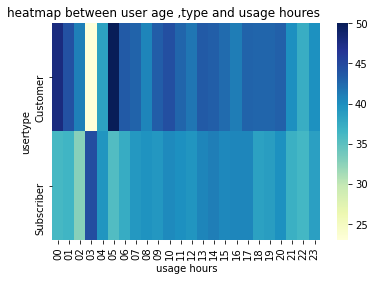

In [43]:
# lets create a heatmap for start hours throgh the day , user type and user age 
heatmap1_data = pd.pivot_table(df2, values='user_age', index=['usertype'], columns='start_hourofday')
chart=sb.heatmap(heatmap1_data, cmap="YlGnBu")
plt.title('heatmap between user age ,type and usage houres', loc='right');
plt.xlabel('usage hours');


we can see that the oldes users are in the custmore type and uses the system at 5 am then 12 am and interstingly enough that the youngest users are also in the csustomer type and uses the system in 3 am but boths of these point consider way too extreem 
but the majouritty of users in age from range 35:40 found more in the subscribe type and uses the system througt the day

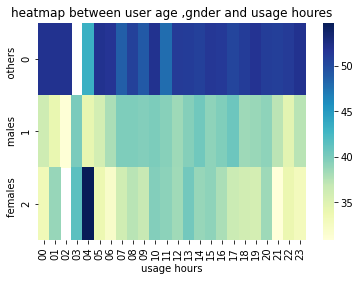

In [44]:
# lets create a heatmap for start hours throgh the day , user type and user age 
heatmap1_data = pd.pivot_table(df2, values='user_age', index=['gender'], columns='start_hourofday')
chart=sb.heatmap(heatmap1_data, cmap="YlGnBu")
plt.title('heatmap between user age ,gnder and usage houres');
plt.xlabel('usage hours');
plt.ylabel('females          males            others'); 


we can see that the males have the age range from 35:44 and after 8 am are the most constant age range "for the males"
the most extreem values occure in the others catigory 
the female have some extreem values too but not as the others 


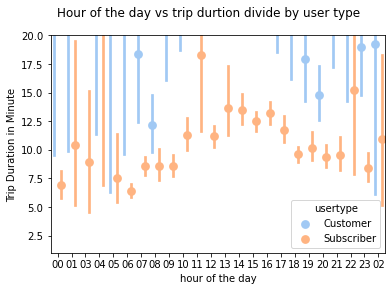

In [45]:
chart=sb.pointplot(data=df2, x='start_hourofday', y='tripduration', hue='usertype', dodge=0.5, linestyles="");
plt.xlabel('hour of the day');
chart.set_ylim([1, 20])
plt.ylabel('Trip Duration in Minute');
plt.suptitle('Hour of the day vs trip durtion divide by user type  ' );

 we can see that scbscribe users have longer trip duration around 11 : 16 ,
customre users have longer trips in the rest time of the day 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> we find that the majouritty of users in age from range 35:40 found more in the subscribe type and uses the system througt the day
>we can see that the males have the age range from 35:44 and after 8 am are the most constant age range "for the males"
the most extreem values occure in the others catigory 
the female have some extreem values too but not as the others 
> we can see that scbscribe users have longer trip duration around 11 : 16  and customre users have longer trips in the rest time of the day 
# customre have longer trips in the rest time of the day 

### Were there any interesting or surprising interactions between features?

> the difference in the customer and subscribe habits throught the day and the variation of the trip duration 

## resorses 
-https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
-https://stackabuse.com/ultimate-guide-to-heatmaps-in-seaborn-with-python
-https://www.python-graph-gallery.com/
-https://www.codegrepper.com/code-examples/python/seaborn+set_xticklabels
-https://www.codecademy.com/articles/seaborn-design-ii
-https://www.geeksforgeeks.org/python-pandas-categoricaldtype/